In [73]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [74]:
df = pd.read_csv("Data/responses.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats


In [87]:
for col in df.columns: 
    print(col) 

Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Rock n roll
Alternative
Latino
Techno, Trance
Opera
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
History
Psychology
Politics
Mathematics
Physics
Internet
PC
Economy Management
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine
Law
Cars
Art exhibitions
Religion
Countryside, outdoors
Dancing
Musical instruments
Writing
Passive sport
Active sport
Gardening
Celebrities
Shopping
Science and technology
Theatre
Fun with friends
Adrenaline sports
Pets
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Smoking
Alcohol
Healthy eating
Daily events
Prioritising workload
Writing notes
Workaholism
Thinking ahead
Final judgement
Reliability
Keeping promises
Loss of interest
Friends versus money
Funniness
Fake
Criminal damage
Decision making
Elec

In [133]:
#y = df["Gender"]
#target_names = ["negative", "positive"]
#dummies = pd.get_dummies(df['Gender'])
y = df['Pets']


In [134]:
selected_features = df[['Folk','Country','Dance','Classical music','Pop','Rock']]


In [135]:
X = selected_features
X.head()

,Folk,Country,Dance,Classical music,Pop,Rock
0,1.0,2.0,2.0,2.0,5.0,5.0
1,1.0,1.0,2.0,1.0,3.0,5.0
2,2.0,3.0,2.0,4.0,3.0,5.0
4,3.0,2.0,4.0,4.0,5.0,3.0
5,3.0,2.0,2.0,3.0,2.0,5.0


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.927/0.290
k: 3, Train/Test Score: 0.543/0.249
k: 5, Train/Test Score: 0.493/0.254
k: 7, Train/Test Score: 0.471/0.260
k: 9, Train/Test Score: 0.453/0.308
k: 11, Train/Test Score: 0.392/0.266
k: 13, Train/Test Score: 0.384/0.249
k: 15, Train/Test Score: 0.384/0.254
k: 17, Train/Test Score: 0.374/0.272
k: 19, Train/Test Score: 0.378/0.296


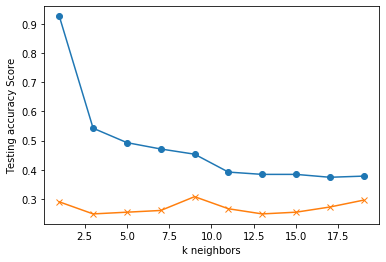

In [137]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [138]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

k=15 Test Acc: 0.266


In [139]:
#new data must be the length of the initial selected features
new_data = [[1, 5 ,2, 5 ,4 ,5]]
predicted_class = knn.predict(new_data)
print(predicted_class)

[1.]


In [140]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'KNN_model.sav'
joblib.dump(knn, filename)

NameError: name 'KNN' is not defined